<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Decision_Trees_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install dask
!pip install dask[complete]
!pip install dask_ml
!pip install dask distributed --upgrade
!pip install dask[dataframe] --upgrade
!pip install dask[bag] --upgrade
!pip install dask[delayed] --upgrade
!pip install dask[array] --upgrade

In [6]:
!pip install scikit-learn
!pip install sklearn_time
!pip install snapml
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

In [7]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [8]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
df=pd.read_csv(url)
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


In [9]:
# display the first rows in the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
n_replicas = 10
# inflate the original dataset by 10 for more realistic size
big_df = pd.DataFrame(np.repeat(df, n_replicas, axis=0), columns=df.columns)

print("There are " + str(len(big_df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_df.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_df.head(11)

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
5,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
6,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
7,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
8,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
9,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


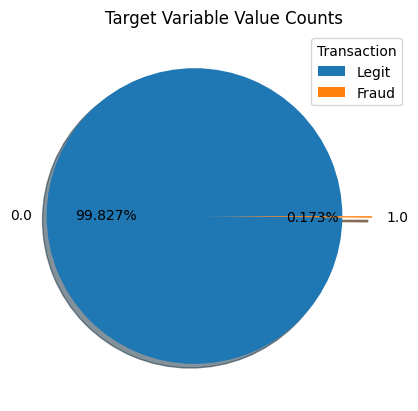

In [11]:
# get the set of distinct classes
labels = big_df.Class.unique()

# get the count of each class
sizes = big_df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode= [0.2, 0], shadow=True, autopct= "%1.3f%%")
ax.set_title('Target Variable Value Counts')
ax.legend(title='Transaction', labels=['Legit', 'Fraud'])
plt.show()

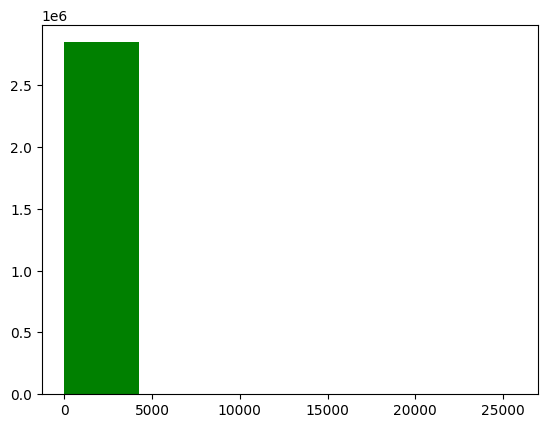

The minimum amount is: 0.0
The maximum amount is: 25691.16
90% of the transactions have an amount less or equal than 203.0


In [12]:
plt.hist(big_df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print('The minimum amount is:', big_df.Amount.min())
print('The maximum amount is:', big_df.Amount.max())
print('90% of the transactions have an amount less or equal than', np.percentile(df.Amount.values, 90))

In [13]:
# data preprocessing such as scaling/normalization is typically useful for
# linear models to accelerate the training convergence

# standardize features by removing the mean (i.e mean: μ = 0) and scaling to unit variance (i.e std: σ = 1).
# Formula used: X'=(X-μ)/σ
big_df.iloc[:, 1:30] = StandardScaler().fit_transform(big_df.iloc[:, 1:30])
data_matrix = big_df.values

#defining our indepedent and depedent variables for fitting:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset and of course 'Class', the target variable)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization i.e Scale input vectors individually to unit norm (vector length ||X||=1)
#and same direction as the original vector.
#Formula used (l1): X' = X/sum(X_i, i, n)
X = normalize(X, norm='l1')

# print the shape of the features matrix and the labels vector
print('The dimensions of X:',  X.shape)
print('The dimensions of y:', y.shape)

The dimensions of X: (2848070, 29)
The dimensions of y: (2848070,)


In [14]:
#Dataset Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f'Train set dimensions: X={X_train.shape} and y={y_train.shape}')
print(f'Test set dimensions: X={X_test.shape} and y={y_test.shape}')

Train set dimensions: X=(1993649, 29) and y=(1993649,)
Test set dimensions: X=(854421, 29) and y=(854421,)


In [15]:
#Build a Decision Tree Classifier model with Scikit-Learn

# compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset.
#The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data: n_samples / (n_classes * np.bincount(y)).
#For this particular case: (legit) w_train = 0.50,
#in order to bias the model to pay more attention to the samples in the minority class (fraud).
w_train = compute_sample_weight('balanced', y_train)

# for reproducible output across multiple function calls, set random_state to a given integer value
#max_depth is the maximum nodes of the tree
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
#Threshold decision for each node: first the diferrent possible thresholds are considered (mid points between X inputs).
#Next, class probabilities are calculated and from them the impurity.
#Then, the weighted average impurity is calculated and finally the total impurity for this particular chocice
# of threshold is calculated. The total impurities for the diferrent possible thresholds are compared and the smaller one
# is selected along with its corresponding threshold.
#sample weight alters the class probabilities in each node, which in turn alters the Impurity of each node
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  18.66270


In [16]:
#Build a Decision Tree Classifier model with Snap ML

# if not already computed,
# compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset
# w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
#snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  6.18428


In [17]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x'.format(training_speedup))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 3.02x
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


In [18]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False, max_iter=10000)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  107.60


In [19]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight="balanced", random_state=25, n_jobs=4, fit_intercept=False , loss="hinge")
#print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s): {0:.2f}".format(snapml_time))

[Snap ML] Training time (s): 18.47


In [20]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print("[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x".format(training_speedup) )

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn = roc_auc_score(y_test, sklearn_pred)
print(f"[Scikit-Learn] ROC-AUC score: {acc_sklearn:.3f}")

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml = roc_auc_score(y_test, snapml_pred)
print(f"[Snap ML] ROC-AUC score: {acc_snapml:0.3f}")

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.83x
[Scikit-Learn] ROC-AUC score: 0.984
[Snap ML] ROC-AUC score: 0.985


In [21]:
#evaluate the quality of the SVM models trained above using the hinge loss metric
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print(f"[Scikit-Learn] Hinge loss: {loss_sklearn:.3f}")

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print(f"[Snap ML] Hinge loss: {loss_snapml:.3f}")

# the two models should give the same Hinge loss

[Scikit-Learn] Hinge loss: 0.234
[Snap ML] Hinge loss: 0.228
